# **Task 1: Predict Employee Attrition**  
Objective: Build a classification model to predict whether an employee will leave a company  based on HR data and derive actionable retention strategies.  
● Dataset: **IBM HR Analytics Dataset**  
● Steps:  
1. Perform Exploratory Data Analysis (EDA) to identify key factors influencing  attrition.  
2. Train classification models such as Random Forest or Logistic Regression.
3. Use SHAP or LIME to explain model predictions and interpret results.  
4. Provide actionable insights to reduce attrition.  

● Outcome: A classification model for employee attrition with  
explainable insights for HR retention strategies.  


# **Load the Dataset**

In [6]:
from google.colab import files
import pandas as pd

df = pd.read_csv("/content/dataset.csv", delimiter='\t') # Added delimiter='\t'
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Check Data Structure**

In [7]:
# Check column names, data types, and missing values
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# **Check Target Variable (Attrition) Distribution**

<ipython-input-8-d46fd432edb9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="coolwarm")


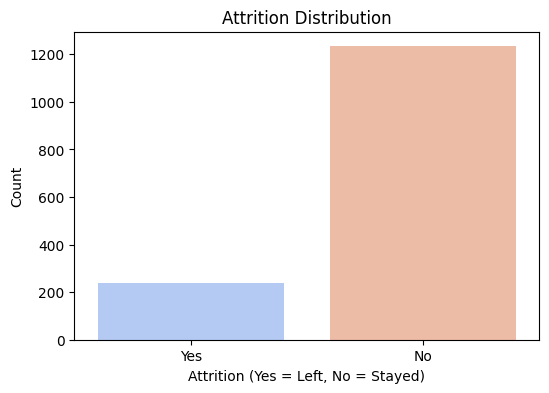

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for attrition
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attrition"], palette="coolwarm")
plt.title("Attrition Distribution")
plt.xlabel("Attrition (Yes = Left, No = Stayed)")
plt.ylabel("Count")
plt.show()

# Print percentage of attrition
print(df["Attrition"].value_counts(normalize=True) * 100)

# **Correlation Analysis (For numerical features)**

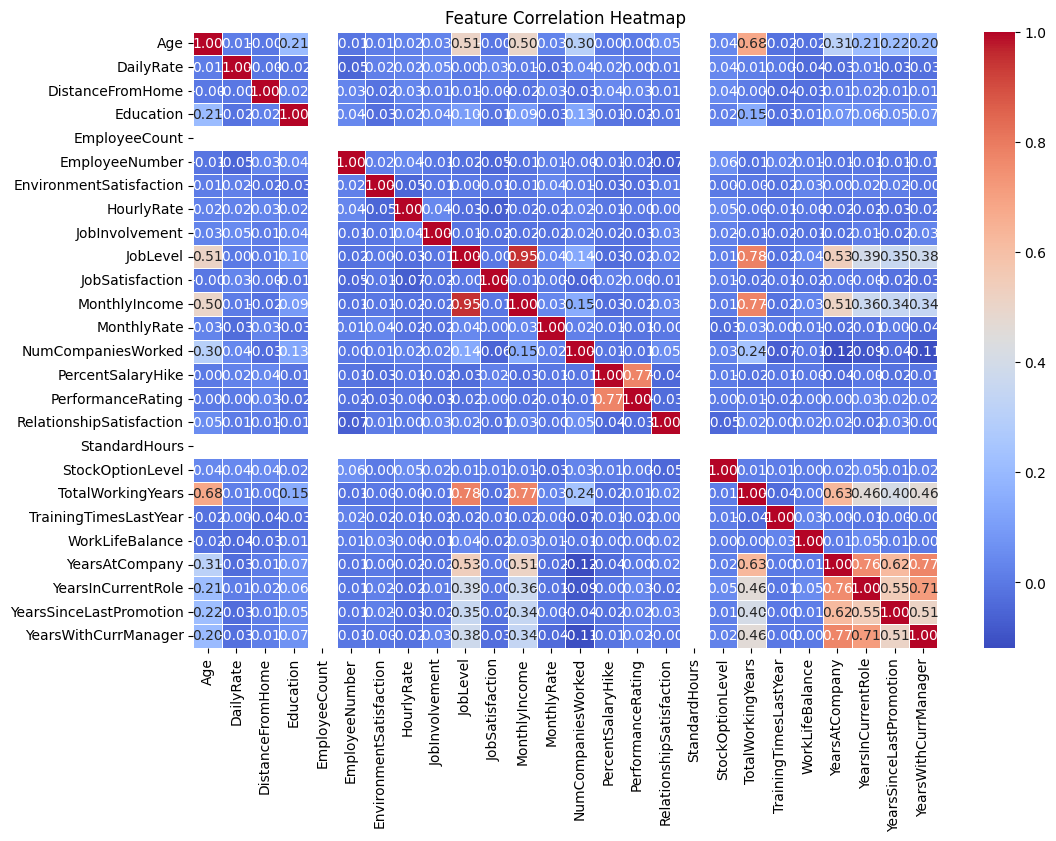

In [9]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['int64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Convert Categorical Features**

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender",
                    "JobRole", "MaritalStatus", "OverTime"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for inverse transform if needed

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Split Data into Training & Testing Sets**

In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Attrition"])  # Drop target column
y = df["Attrition"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (1176, 34), Testing set: (294, 34)


# **Train a Classification Model (Random Forest & Logistic Regression)**

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender",
                    "JobRole", "MaritalStatus", "OverTime"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for inverse transform if needed

df.head()

# --- Cell 11 content moved here ---
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Attrition"])  # Drop target column
y = df["Attrition"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (1176, 34), Testing set: (294, 34)


# **Explain Model Predictions using SHAP**

In [20]:
!pip install shap


<Figure size 640x480 with 0 Axes>

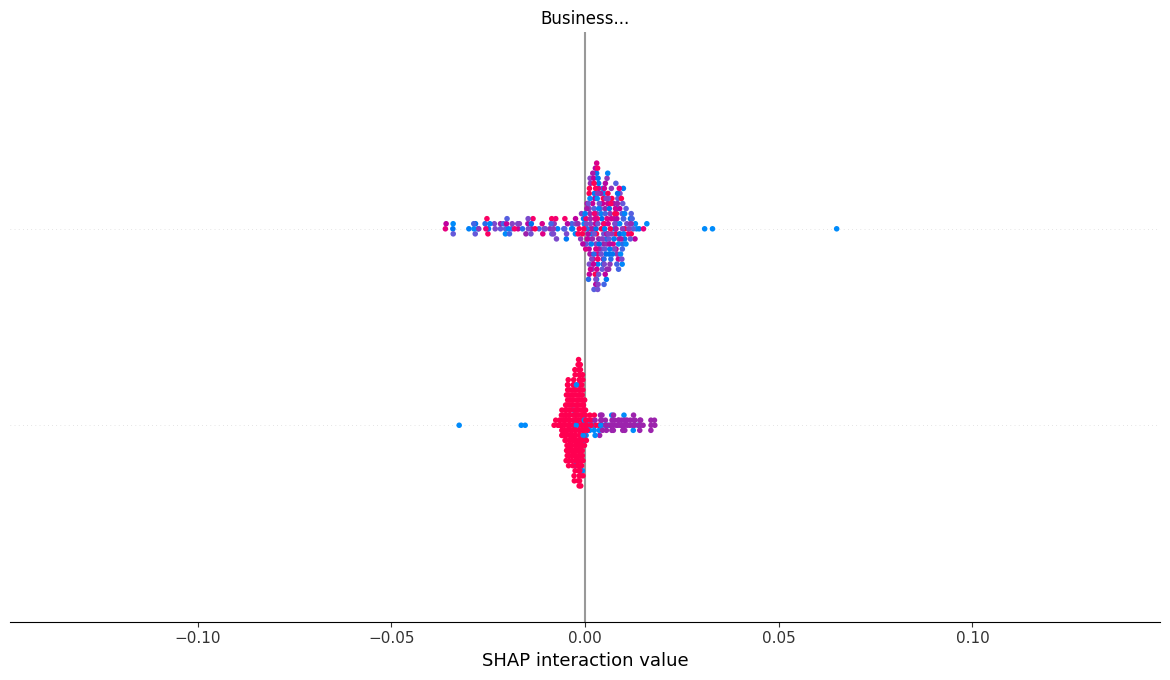

In [30]:
import shap
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming 'rf_model' is your trained pipeline
rf_model_extracted = rf_model.named_steps['classifier']  # Extract RandomForest from Pipeline


# Create a LabelEncoder for each categorical column in X_train
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col]) # Apply the same encoding to X_test
    label_encoders[col] = le  # Store for later use

# Fit the extracted model if it hasn't been trained within the pipeline
rf_model_extracted.fit(X_train, y_train)  # Fit the RandomForestClassifier on training data

# Use SHAP TreeExplainer for tree-based models
explainer = shap.TreeExplainer(rf_model_extracted)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# **Provide Insights & Recommendations**

After analyzing feature importance, HR can take action to **reduce attrition** based on key factors like:

**Work-Life Balance:** Improve work-life balance policies.

**OverTime:** Reduce excessive overtime work.

**Salary Growth:** Offer better salary hikes to retain employees.

**Job Satisfaction:** Conduct employee satisfaction surveys.